In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total']=df['TV']+df['newspaper']+df['radio']
df.head()

,TV,radio,newspaper,sales,total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total', ylabel='sales'>

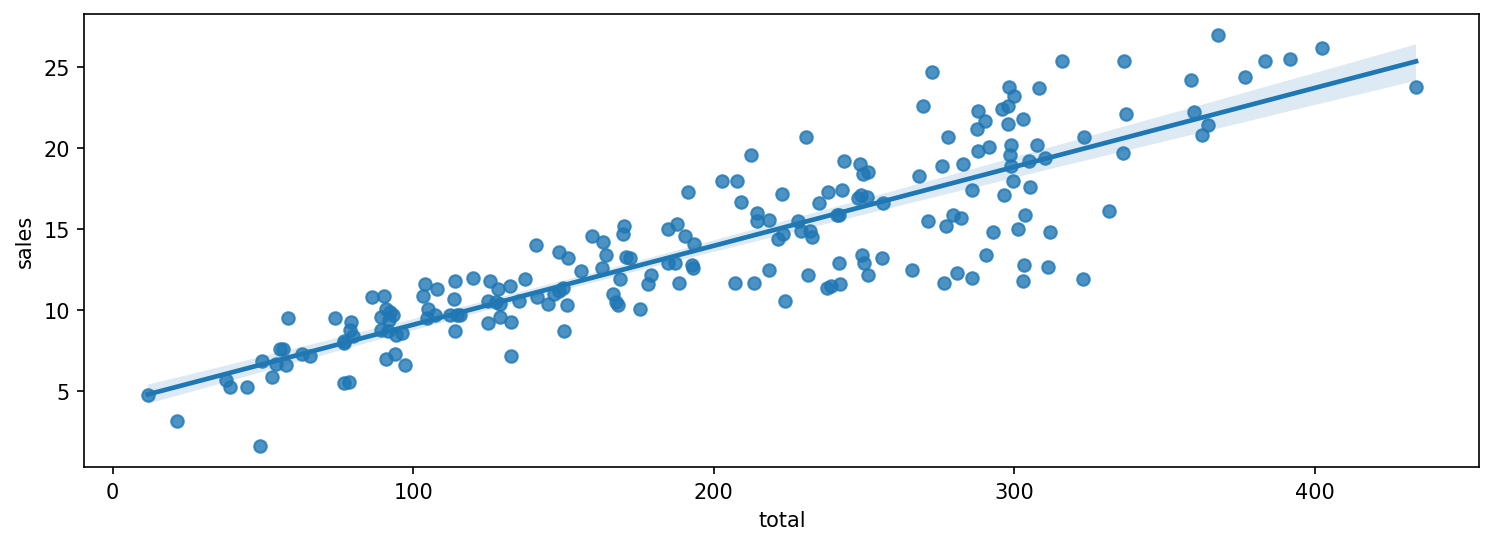

In [5]:
plt.figure(figsize=(12,4),dpi=150)
sns.regplot(x='total',y='sales',data=df)

In [6]:
X=df['total']
y=df['sales']

In [7]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [8]:
potential_spend=np.linspace(0,500,100)
potential_sales=0.04868788*potential_spend + 4.24302822

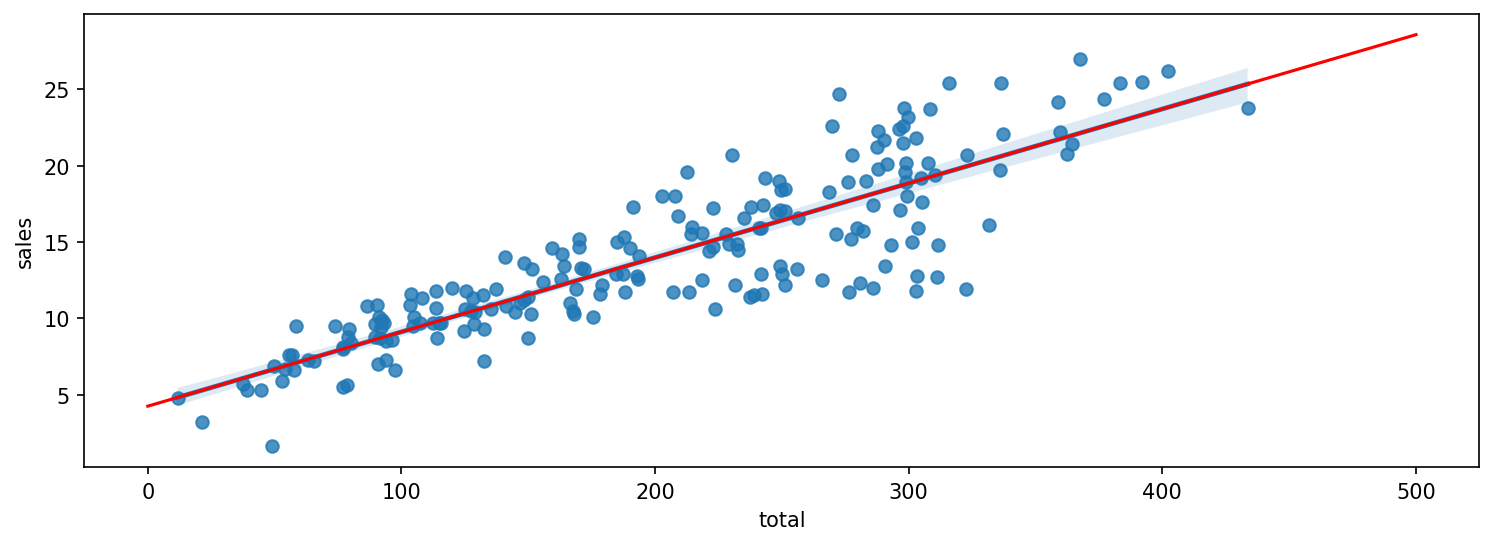

In [9]:
plt.figure(figsize=(12,4),dpi=150)
sns.regplot(x='total',y='sales',data=df)

plt.plot(potential_spend,potential_sales,color='red')

In [10]:
np.polyfit(X,y,3)
potential_spend = np.linspace(0,500,100)
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00


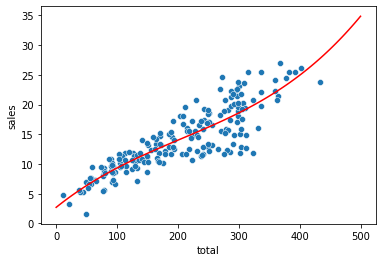

In [11]:
sns.scatterplot(x='total',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

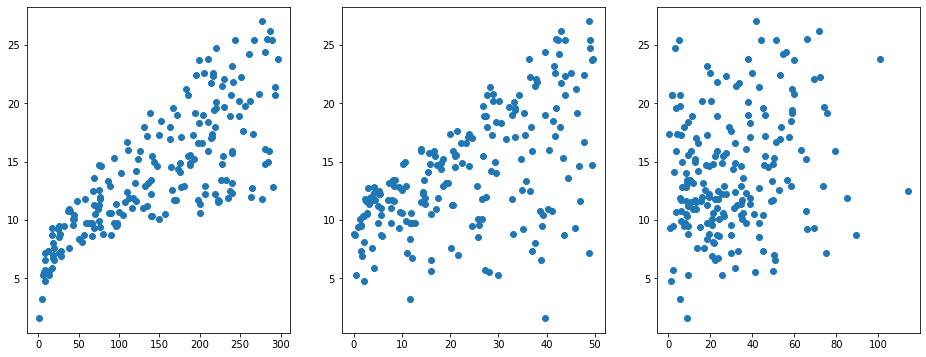

In [12]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[1].plot(df['radio'],df['sales'],'o')
axes[2].plot(df['newspaper'],df['sales'],'o')

In [37]:
X=df.drop(['sales','total'],axis=1)

In [38]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
y=df['sales']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# help(train_test_split)

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [19]:
len(df)

200

In [20]:
len(X_train)


140

In [21]:
from sklearn.linear_model import LinearRegression

In [ ]:
help(LinearRegression)

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
test_predictions=model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
df['sales'].mean()

14.0225

In [28]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144812

In [29]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993888

In [30]:
residual=y_test-test_predictions

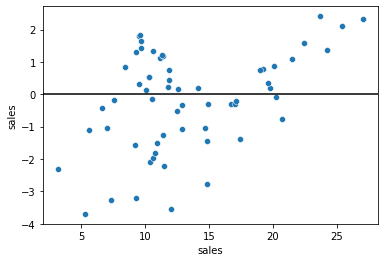

In [33]:
sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0,color='black')

In [39]:
final_model=LinearRegression()

In [40]:
final_model.fit(X,y)

LinearRegression()

In [42]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [43]:
from joblib import load,dump

In [44]:
dump(final_model,'final_model.joblib')

['final_model.joblib']

In [45]:
loaded=load('final_model.joblib')

In [46]:
loaded.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [51]:
c=[[149,22,12]]
loaded.predict(c)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])